# Learn the Basics

---


Tutorial from [PyTorch Docs](https://docs.pytorch.org/tutorials/beginner/basics/intro.html)

## Working with data

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets 
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

In [3]:
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

In [4]:
batch_size = 64

# create ata loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size) 
test_dataloader = DataLoader(test_data, batch_size=batch_size) 

In [5]:
for X, y in test_dataloader:
    print("Shape of X in [N, C, H, W]:", X.shape)
    print("Shape of y:", y.shape)
    break

Shape of X in [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64])


In [6]:
def show_image(images, labels, img_indx:int = 0)-> None:
    image = images[img_indx].squeeze()
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {y[img_indx]}")
    plt.show()

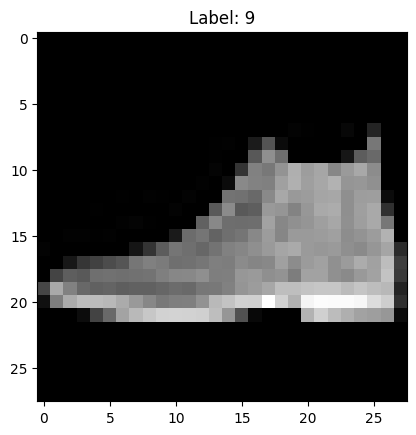

In [7]:
show_image(images=X, labels=y, img_indx=0)

## Creating Models


In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10) # out comes the logits
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Optimizing the Model Parameters

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [10]:
def train(dataloader, model, loss_fn, optimizer): 
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X) # forward pass
        loss = loss_fn(pred, y)

        # backpropagation, backward pass
        # computes the gradient of the loss function with respect to the weights, 
        # and backpropagates the error to update the params
        loss.backward() 
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1)*len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")


In [11]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # evaluation mode
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error \n Accuracy: {100*correct:>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [12]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1} \n ---------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1 
 ---------------------------------
loss: 2.288965 [   64/60000]
loss: 2.277383 [ 6464/60000]
loss: 2.263122 [12864/60000]
loss: 2.264554 [19264/60000]
loss: 2.236079 [25664/60000]
loss: 2.217101 [32064/60000]
loss: 2.220812 [38464/60000]
loss: 2.184091 [44864/60000]
loss: 2.179091 [51264/60000]
loss: 2.150894 [57664/60000]
Test Error 
 Accuracy: 57.0%, Avg loss: 2.138752

Epoch 2 
 ---------------------------------
loss: 2.145111 [   64/60000]
loss: 2.128273 [ 6464/60000]
loss: 2.072450 [12864/60000]
loss: 2.091173 [19264/60000]
loss: 2.025084 [25664/60000]
loss: 1.987273 [32064/60000]
loss: 2.008325 [38464/60000]
loss: 1.927154 [44864/60000]
loss: 1.937023 [51264/60000]
loss: 1.856963 [57664/60000]
Test Error 
 Accuracy: 59.4%, Avg loss: 1.848681

Epoch 3 
 ---------------------------------
loss: 1.889023 [   64/60000]
loss: 1.844311 [ 6464/60000]
loss: 1.722860 [12864/60000]
loss: 1.764239 [19264/60000]
loss: 1.638370 [25664/60000]
loss: 1.621700 [32064/60000]
loss: 1.634026

## Saving Models

In [13]:
torch.save(model.state_dict(), "models/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [14]:
model = NeuralNetwork()
model.load_state_dict(torch.load("models/model.pth", weights_only=True))

<All keys matched successfully>

In [15]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [16]:
x, y = test_data[1]

In [17]:
y

2

In [18]:
def show_image_and_model_pred(model, img_indx:int = 0)-> None:
    x, y = test_data[img_indx][0], test_data[img_indx][1]
    image = x[0]
    plt.imshow(image, cmap="gray")
    model.eval()
    with torch.no_grad():
        pred = model(x)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        correct = "✅" if predicted == actual else "❌"
    print(f'Predicted: "{predicted}", Actual: "{actual}" {correct}')
    plt.show()

Predicted: "Ankle boot", Actual: "Ankle boot" ✅


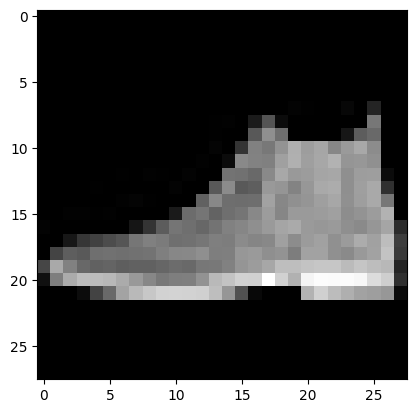

In [19]:
show_image_and_model_pred(model=model)

Predicted: "Coat", Actual: "Coat" ✅


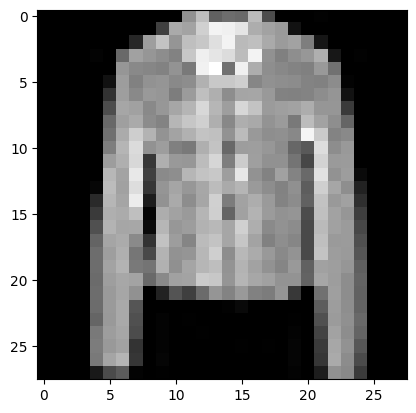

Predicted: "Sneaker", Actual: "Sandal" ❌


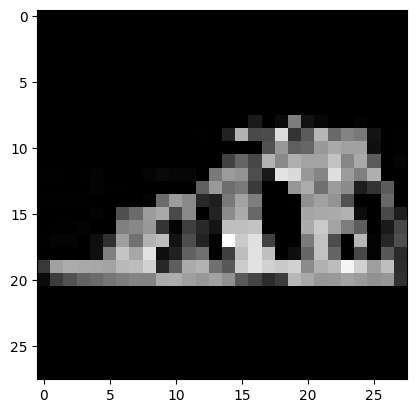

Predicted: "Sneaker", Actual: "Sneaker" ✅


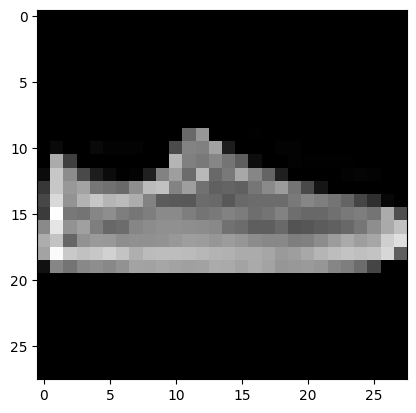

Predicted: "Dress", Actual: "Dress" ✅


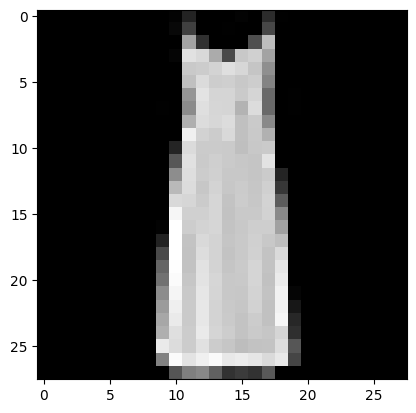

Predicted: "Coat", Actual: "Coat" ✅


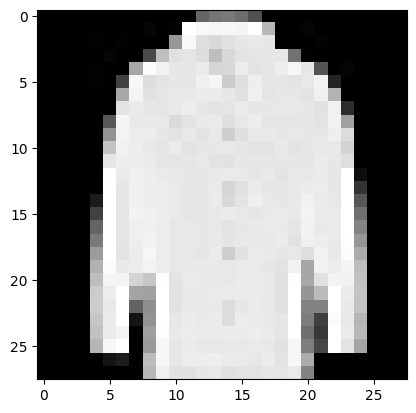

Predicted: "Trouser", Actual: "Trouser" ✅


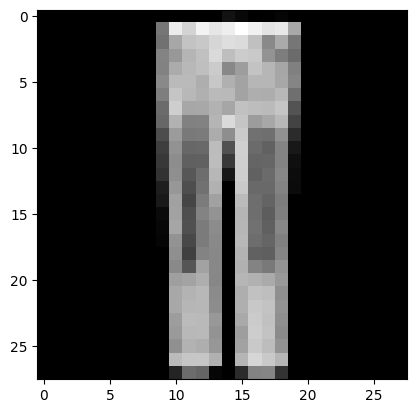

Predicted: "Pullover", Actual: "Pullover" ✅


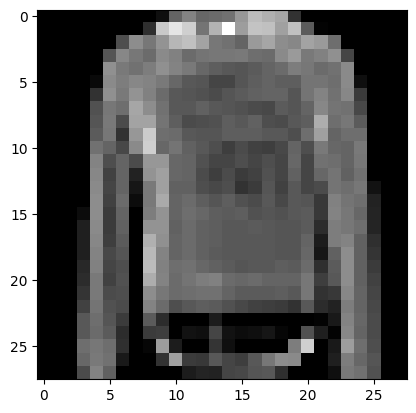

Predicted: "Pullover", Actual: "Coat" ❌


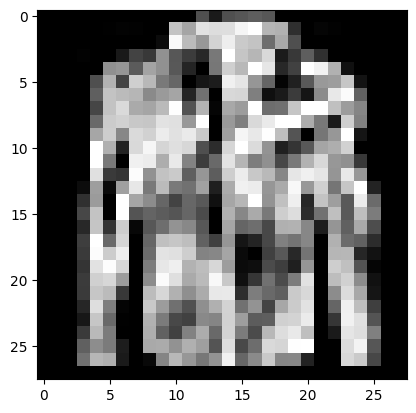

Predicted: "Bag", Actual: "Bag" ✅


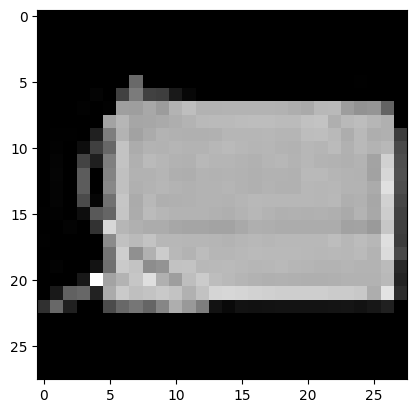

Predicted: "T-shirt/top", Actual: "T-shirt/top" ✅


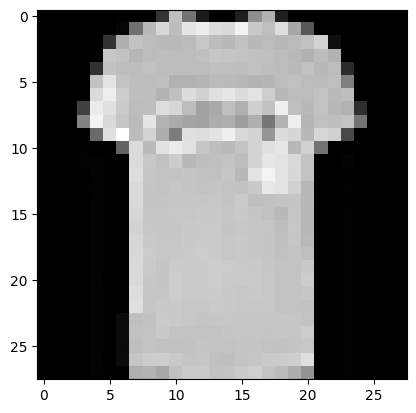

In [20]:
for i in range(10, 20):
    show_image_and_model_pred(model=model, img_indx=i)